In [3]:
!pip install pandas requests matplotlib

In [6]:
# Cell 2: Get Ethereum prices
import requests
import pandas as pd

# CoinGecko API endpoint
url = "https://api.coingecko.com/api/v3/coins/ethereum/market_chart?vs_currency=usd&days=90"

# Fetch data
response = requests.get(url)
print("API Status:", response.status_code)  # Should show 200 if successful

# Convert to Python dictionary
data = response.json()

API Status: 200


In [5]:
print("Available keys:", data.keys())  # Should show 'prices', 'market_caps', 'total_volumes'

Available keys: dict_keys(['prices', 'market_caps', 'total_volumes'])


In [9]:
# Cell 4: Create a clean DataFrame
# Extract prices (list of [timestamp, price])
prices = data['prices']

# Create DataFrame
df = pd.DataFrame(prices, columns=['timestamp', 'price'])

# Convert timestamp to readable date
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')

# Remove timestamp column
df = df.drop('timestamp', axis=1)

# Show first 5 rows
df.head()

,price,date
0,1911.873924,2025-03-17 04:01:01.605
1,1901.458358,2025-03-17 05:08:26.187
2,1898.510010,2025-03-17 06:09:52.382
3,1894.087933,2025-03-17 07:01:02.282
4,1900.667114,2025-03-17 08:04:55.020


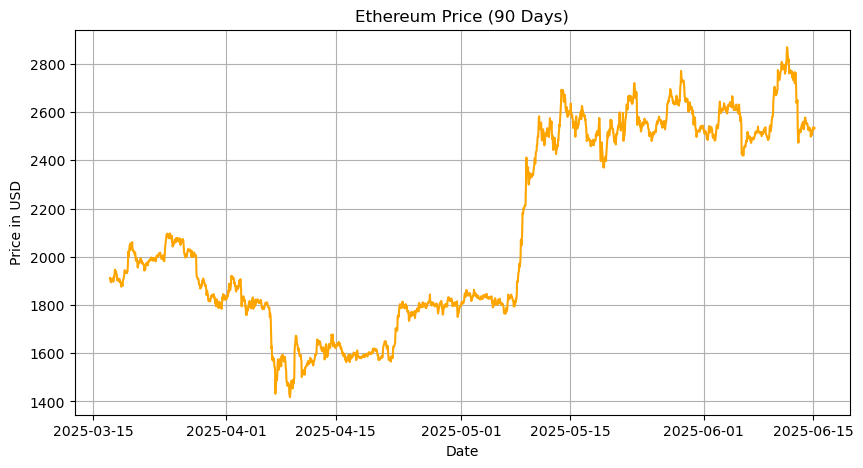

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['price'], color='orange')
plt.title("Ethereum Price (90 Days)")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.grid(True)
plt.show()

In [15]:
# Cell 6: Find unusual price movements
# Calculate 7-day moving average
df['7d_ma'] = df['price'].rolling(window=7).mean()

# Flag prices 3% above/below average
df['anomaly'] = abs(df['price'] - df['7d_ma']) / df['7d_ma'] > 0.05

# Show anomalies
anomalies = df[df['anomaly'] == True]
print(f"Found {len(anomalies)} potential anomalies!")

Found 10 potential anomalies!


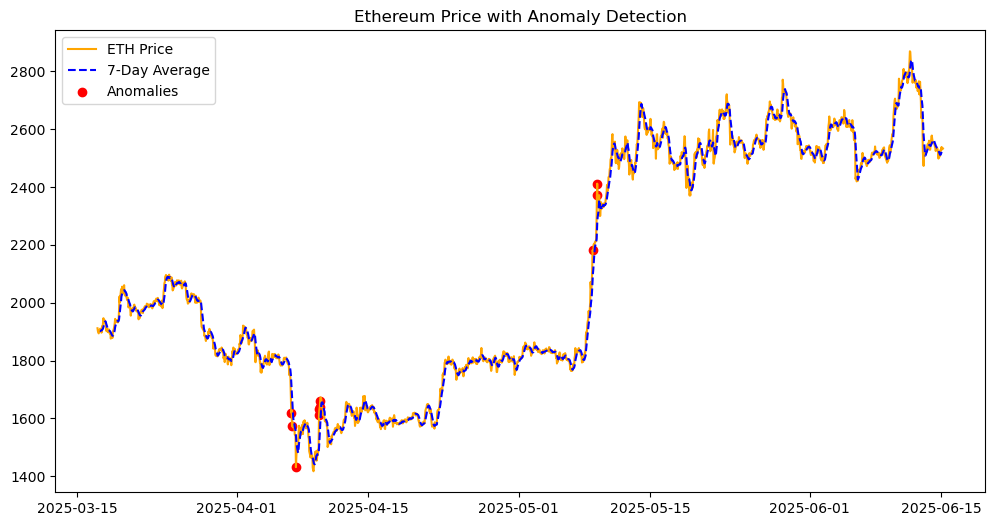

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['price'], label='ETH Price', color='orange')
plt.plot(df['date'], df['7d_ma'], label='7-Day Average', linestyle='--', color='blue')

# Plot anomalies as red dots
plt.scatter(anomalies['date'], anomalies['price'], color='red', label='Anomalies')

plt.title("Ethereum Price with Anomaly Detection")
plt.legend()
plt.show()

In [17]:
# Add this after price data
volumes = data['total_volumes']
df_vol = pd.DataFrame(volumes, columns=['timestamp', 'volume'])

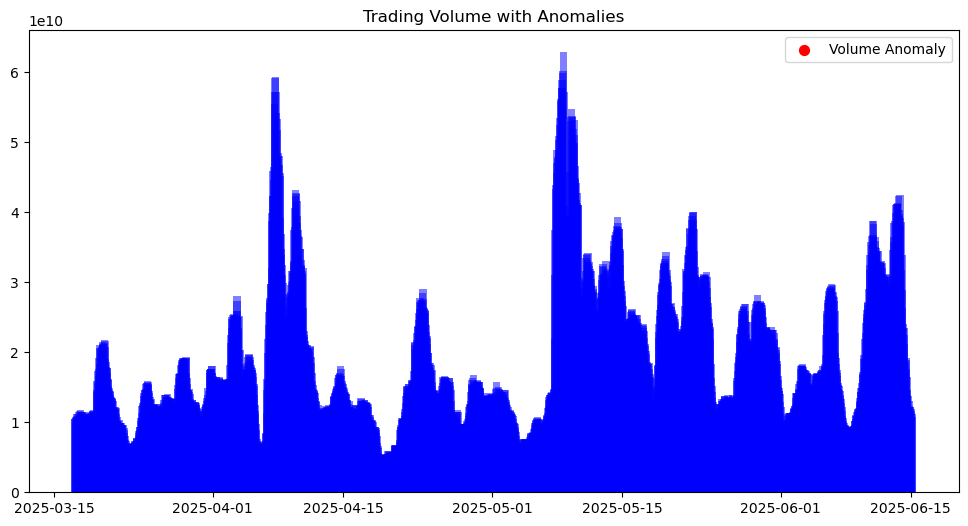

In [18]:
# After your existing code
volumes = data['total_volumes']
df_volume = pd.DataFrame(volumes, columns=['timestamp', 'volume'])
df_volume['date'] = pd.to_datetime(df_volume['timestamp'], unit='ms')
df = pd.merge(df, df_volume[['date', 'volume']], on='date')

# Detect volume anomalies (3x average volume)
df['avg_volume'] = df['volume'].rolling(window=7).mean()
df['volume_anomaly'] = df['volume'] > 3 * df['avg_volume']

# Plot volume anomalies
plt.figure(figsize=(12,6))
plt.bar(df['date'], df['volume'], color='blue', alpha=0.5)
plt.scatter(df[df['volume_anomaly']]['date'], 
            df[df['volume_anomaly']]['volume'], 
            color='red', s=50, label='Volume Anomaly')
plt.title("Trading Volume with Anomalies")
plt.legend()
plt.show()